In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
np.shape(x_train)

(60000, 28, 28)

In [5]:
def relu(vec):
    return np.maximum(0,vec)

def maxPooling(Mat):
    if(len(Mat)%2!=0):
        MatTemp = np.zeros([len(Mat)+1,len(Mat)+1])
        MatTemp[0:len(Mat), 0:len(Mat)] = Mat
        Mat = MatTemp
        
    grids = int(len(Mat)/2)
    Output = np.zeros([grids,grids])
    
    for i in range(grids):
        for j in range(grids):
            Output[i,j] = np.max(Mat[2*i:2*i+2,2*j:2*j+2])
    
    return Output

In [6]:
def kernel2Mat(img,ker):
    flatten = img.reshape(-1,1)
    kerMat = np.zeros([(len(img)-2)**2,np.shape(flatten)[0]])
    flatKernel = np.zeros([len(ker),len(img)])
    dim = len(img)-len(ker)+1
    
    for i in range(len(ker)):
        flatKernel[i] = np.hstack([ker[i], np.zeros(len(img)-len(ker))])
        
    flatKernel = flatKernel.reshape(1,-1)
    flatKernel = flatKernel[:,0:np.shape(flatKernel)[1]-(len(img)-len(ker))]
    
    for i in range(dim):
        kerMat[i, i:i+np.shape(flatKernel)[1]] = flatKernel
        
    for j in range(dim):
        kerMat[j*dim:j*dim+dim , j*len(img) : j*len(img)+(np.shape(flatKernel)[1])+1] = kerMat[0:dim, 0:(np.shape(flatKernel)[1])+1 ]

    return kerMat

In [7]:
def convolution(img,ker):
    flatten = img.reshape(-1,1)
    convMat = kernel2Mat(img,ker)
    convolution = convMat.dot(flatten)
    dim = int(np.shape(convolution)[0]**0.5)
    return convolution.reshape(dim,dim)

In [328]:
def convLayer(imgs,ker):
    feature = np.zeros([np.shape(imgs)[0],121])
    
    for i in range(len(imgs)):
        img=imgs[i]
        
        '''for itr in range(1):
            img = relu(convolution(img,ker))
            img = maxPooling(img)'''
        
        img = convolution(img,ker)
        img = relu(img)
        img = maxPooling(img)
        
        img = convolution(img,ker)
        img = relu(img)
        
            
        feature[i] = img.reshape(1,-1)
    
    return feature  

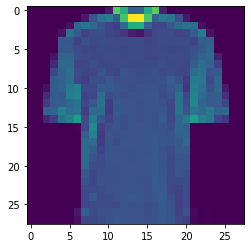

In [9]:
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
plt.imshow(x_train[59998])

In [10]:
clothList = []
img0 = x_train[59998]
img1 = convolution(img0,kernel)
img2 = relu(img1)
img3 = maxPooling(img2)
img4 = relu(convolution(img3,kernel))
img5 = maxPooling(img4)
img6 = relu(convolution(img5,kernel))
img7 = maxPooling(img6)

clothList.append(img0)
clothList.append(img1)
clothList.append(img2)
clothList.append(img3)
clothList.append(img4)
clothList.append(img5)
clothList.append(img6)
clothList.append(img7)

labelList = []
labelList.append('Original 28x28')
labelList.append('Convolved 26x26')
labelList.append('Rectified Linear(Relu) 26x26')
labelList.append('MaxPooling 13x13')
labelList.append('Convolve,Relu 11x11')
labelList.append('MaxPooling,Padding 6x6')
labelList.append('Convolve,Relu 4x4')
labelList.append('MaxPooling 2x2')

Image Compression


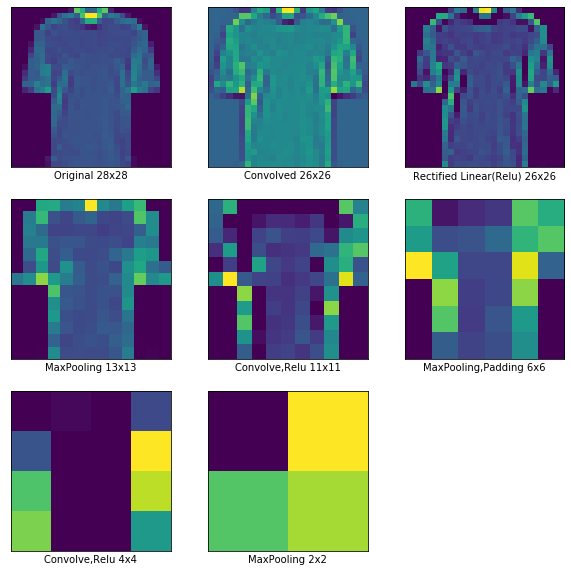

In [36]:
print('Image Compression')
plt.figure(figsize=(10,10))
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(clothList[i])
    plt.xlabel(labelList[i])
plt.show()

In [12]:
kernel

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [285]:
#Vectorize Kernal in sparse convolution Matrix
#For Convolution and Transpose Convolution
import pandas as pd
convMat = kernel2Mat(img0,kernel);
df = pd.DataFrame(convMat);df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [329]:
#Perform Convolution on Train Set
ConvolvedTrain = convLayer(x_train,kernel)

In [330]:
#Perform Convolution on Test Set
ConvolvedTest = convLayer(x_test,kernel)

In [368]:
#Deep Neural Net

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# regulizer 
from tensorflow.keras import regularizers

In [373]:
#model Architecture
model = Sequential()
model.add(Dropout(0.2, input_shape=(121,),seed=1, noise_shape=None))
model.add(Dense(121, input_dim=121, kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, activation='relu'))
model.add(Dense(242, use_bias=True, kernel_initializer='random_uniform', bias_initializer='zeros', activation='tanh'))
model.add(Dense(10, use_bias=True, kernel_initializer='random_uniform', bias_initializer='zeros', activation='softmax'))

#optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.00075, beta_1=0.9, beta_2=0.999, amsgrad=True)
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [378]:
#  Model Fitting
model.fit(ConvolvedTrain, y_train.reshape(-1,1), epochs=150, batch_size=4096)

Epoch 1/150
60000/60000 [==============================] - 1s 16us/sample - loss: 0.5274 - acc: 0.8004
Epoch 2/150
60000/60000 [==============================] - 1s 16us/sample - loss: 0.5232 - acc: 0.80160s - loss: 0.5234 - acc:
Epoch 3/150
60000/60000 [==============================] - 1s 16us/sample - loss: 0.5255 - acc: 0.8026
Epoch 4/150
60000/60000 [==============================] - 1s 15us/sample - loss: 0.5233 - acc: 0.8028
Epoch 5/150
60000/60000 [==============================] - 1s 15us/sample - loss: 0.5255 - acc: 0.8009
Epoch 6/150
60000/60000 [==============================] - 1s 16us/sample - loss: 0.5196 - acc: 0.8021
Epoch 7/150
60000/60000 [==============================] - 1s 16us/sample - loss: 0.5199 - acc: 0.8030
Epoch 8/150
60000/60000 [==============================] - 1s 16us/sample - loss: 0.5223 - acc: 0.8020
Epoch 9/150
60000/60000 [==============================] - 1s 16us/sample - loss: 0.5192 - acc: 0.8035
Epoch 10/150
60000/60000 [=======================

60000/60000 [==============================] - 1s 16us/sample - loss: 0.5067 - acc: 0.8087
Epoch 79/150
60000/60000 [==============================] - 1s 16us/sample - loss: 0.5069 - acc: 0.8081
Epoch 80/150
60000/60000 [==============================] - 1s 17us/sample - loss: 0.5093 - acc: 0.8091
Epoch 81/150
60000/60000 [==============================] - 1s 16us/sample - loss: 0.5116 - acc: 0.8062
Epoch 82/150
60000/60000 [==============================] - 1s 16us/sample - loss: 0.5082 - acc: 0.8070
Epoch 83/150
60000/60000 [==============================] - 1s 17us/sample - loss: 0.5087 - acc: 0.8077
Epoch 84/150
60000/60000 [==============================] - 1s 17us/sample - loss: 0.5090 - acc: 0.8065
Epoch 85/150
60000/60000 [==============================] - 1s 17us/sample - loss: 0.5107 - acc: 0.8061
Epoch 86/150
60000/60000 [==============================] - 1s 17us/sample - loss: 0.5099 - acc: 0.8064
Epoch 87/150
60000/60000 [==============================] - 1s 16us/sample - 

In [379]:
# Model Evaluation
_, accuracy = model.evaluate(ConvolvedTest, y_test)
print('Accuracy: %.2f' % (accuracy*100))

10000/10000 [==============================] - 1s 140us/sample - loss: 0.4871 - acc: 0.8181
Accuracy: 81.81
